## <center>SUPERNATURAL EMPOWERMENT SUMMIT,2023 </center>

##### IMPORT PACKAGES

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always') 

##### LOAD AND DISPLAY DATASET

In [10]:
ses23 = pd.read_csv("SES '23.csv")
ses23.head()

,Timestamp,Title,First Name,Last Name,Mobile Number,WhatsApp Number,Email Address,Country,Occupation,Name of Church
0,2023/05/22 7:06:16 PM GMT,Mr,Evans,Coffie,0249884472,0249884472,NaN,Ghana,NaN,Teminar
1,2023/05/22 7:07:14 PM GMT,Mr,Noble,King,0240219533,0240219533,NaN,Ghana,NaN,Perez Chapel
2,2023/05/22 7:07:20 PM GMT,Mr,Appiedu,Owusu Acheampong,0244450039,0244450039,appiedu.acheampong@gmail.com,Ghana,NaN,Perz Chapel
3,2023/05/22 7:08:43 PM GMT,Rev,Albert,T Kamara,0243801382,0243801382,NaN,Ghana,NaN,Perez Chapel
4,2023/05/22 7:08:43 PM GMT,Rev.,David K.,Smith,0245127629,0245127629,rev.davidkwesismith@yahoo.com,Ghana,"Cleric (Pastors, Reverends etc)",C.Y.N


##### GENERAL OVERVIEW OF THE DATASET.

##### CHECK THE SHAPE OF THE DATASET.

In [11]:
print("Shape of the dataset:", ses23.shape)

Shape of the dataset: (3598, 10)


##### DISPLAY THE COLUMNS AND THEIR DATA TYPES

In [12]:
print("Columns and data types:")
print(ses23.dtypes)

Columns and data types:
Timestamp          object
Title              object
First Name         object
Last Name          object
Mobile Number      object
WhatsApp Number    object
Email Address      object
Country            object
Occupation         object
Name of Church     object
dtype: object


##### GENERAL INFO OF THE DATASET

In [13]:
ses23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Timestamp        3598 non-null   object
 1   Title            3598 non-null   object
 2   First Name       3598 non-null   object
 3   Last Name        3598 non-null   object
 4   Mobile Number    3598 non-null   object
 5   WhatsApp Number  883 non-null    object
 6   Email Address    1467 non-null   object
 7   Country          3598 non-null   object
 8   Occupation       209 non-null    object
 9   Name of Church   3188 non-null   object
dtypes: object(10)
memory usage: 281.2+ KB


##### CHECK FOR MISSING VALUES.

In [14]:
# Display the count of missing values per column
print("Count of missing values per column:")
print(ses23.isnull().sum())

Count of missing values per column:
Timestamp             0
Title                 0
First Name            0
Last Name             0
Mobile Number         0
WhatsApp Number    2715
Email Address      2131
Country               0
Occupation         3389
Name of Church      410
dtype: int64


##### DISPLAY THE HEATMAP FOR ALL MISSING VALUES.

<AxesSubplot: >

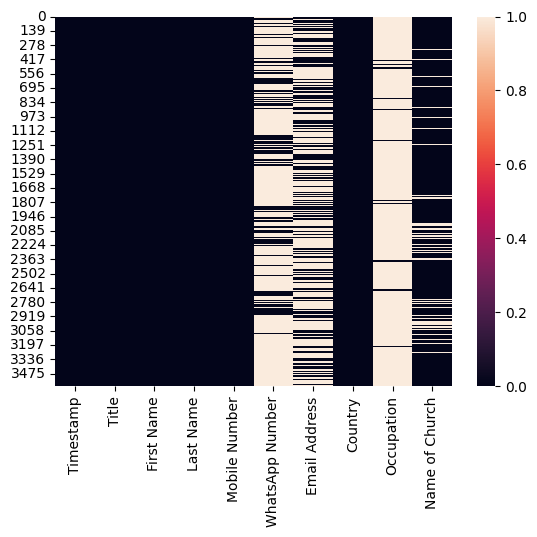

In [15]:
sns.heatmap(ses23.isnull())

##### Insights
From the above statistics, it has been identified that there are some missing values in the <b>SUPERNATURAL EMPOWERMENT SUMMIT, 2023</b>, data set.

Below are the statistics of the missing data:
    
- WhatsApp Number - 2715 missing values


- Email Address   - 2131 missing values


- Occupation      - 3389 missing values


- Name of Church  - 410  missing values

##### DISPLAY TOTAL NUMBER OF MISSING VALUES.

In [16]:
Total_MV = ses23.isna().sum().sum()
print('The total number of missing values in this dataset is', Total_MV)

The total number of missing values in this dataset is 8645


##### CREATE A COPY OF THE ORIGINAL DATASET

In [17]:
ses23.copy = ses23.copy()

##### DROP UNNECESSARY COLUMNS

In [18]:
ses23.drop (columns=['Last Name','Mobile Number','WhatsApp Number','Email Address'], inplace = True)

##### DISPLAY VALUES IN THE OCCUPATION COLUMNS.

In [19]:
ses23['Occupation'].unique()

array([nan, 'Cleric (Pastors, Reverends etc)', 'Business Owners',
       'Students', 'White collar (those with office jobs)',
       'Civil servant (police, immigration, etc)',
       'Blue collar (those into construction, painting, plumbing etc)',
       'Educationists (e.g. teachers, lecturers )'], dtype=object)

##### RENAME THE VARIOUS OCCUPATION

In [20]:
ses23['Occupation']=ses23['Occupation'].replace('Cleric (Pastors, Reverends etc)', 'Clergy')
ses23['Occupation']=ses23['Occupation'].replace('White collar (those with office jobs)', 'Office Workers')
ses23['Occupation']=ses23['Occupation'].replace('Civil servant (police, immigration, etc)', 'Civil Servants')
ses23['Occupation']=ses23['Occupation'].replace('Blue collar (those into construction, painting, plumbing etc)', 'Artisans')
ses23['Occupation']=ses23['Occupation'].replace('Educationists (e.g. teachers, lecturers )', 'Educationists')

##### FILL NULL VALUES WITH CLERGY.

In [21]:
ses23['Occupation'].fillna('Clergy', inplace=True)
ses23['Occupation'].unique()

array(['Clergy', 'Business Owners', 'Students', 'Office Workers',
       'Civil Servants', 'Artisans', 'Educationists'], dtype=object)

##### DISPLAY THE NAME OF CHURCHES IN THIS DATASET.

In [22]:
ses23['Name of Church'].unique()

array(['Teminar', 'Perez Chapel', 'Perz Chapel', 'C.Y.N',
       'Perez Chapel, Lome', 'Peniel', 'PEREZ TRASAACO', 'GIPM',
       'Perez Dome', 'Perez ', 'Perez Dome ', 'R.D',
       'Living Hope Internetional', 'Perez', 'L.D.S', 'LGCG', 'PCI',
       'Calvary Power', 'Dome', 'FOLP', 'C.O.P', 'GHARIS', 'Coin Int',
       'PCM', 'TBC', 'AWG', 'Perez Aflao ', 'Cantoments', 'PCI Denu',
       'Perez/French', nan, 'PCI ', 'Perez French ', 'Action Chapel',
       'Christ Lunie du Nation', 'LGC', 'FMBU', 'MK', 'Royalhouse', 'WCI',
       'KCIC', 'Fire family', 'Top Church International ', 'TAC',
       'Ghana ', 'Fiqa', 'Pentecost', 'Perez Amanfro', 'Jesus Power',
       'Anglican', 'KCM', 'VGM', 'HKOMI', '3R', 'Perez- zoeland ', 'EECA',
       'ATOG', 'Havest', 'Posibilities', 'HJM', 'LIBC', 'Perez Zoeland ',
       'Roman', 'Church of Christ', 'Rapha Centre', '-', 'Pci', 'ICGC',
       'CSWC', 'MELN ', 'EFC', 'MELN', 'First Century', 'Deeper Life',
       'TFGM', 'AWC', 'Harvest Trmple', '

##### CORRECT WRONGLY SPELT NAMES OF CHURCHES

In [23]:
ses23['Name of Church'] = ses23['Name of Church'].replace('Perz Chapel','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel, Lome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Dome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Dome ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Aflao ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Cantoments','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Denu','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/French','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez French ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Amanfro','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez- zoeland ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Zoeland ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zoeland','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCi','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-La','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Zoe','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Zealand','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Dome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('P C I','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dome-Above Chapel ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Hq','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Takoradi','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI FRENCH','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI DOME','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci Nkwanta','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/Amsterdam','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/Dome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zoeland ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dome ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci/ French','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI French','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Campus Ministry','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Campus Ministry ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Dome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez DOme','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Zoeland','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Atomic','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelDome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelHq','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelFRENCH','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelZoe','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelHq','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelFRENCH','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelDOME','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel/ French','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelFrench','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelNkwanta','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('-','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/French ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Tesano','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zoe','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/ French','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez French SCE','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Odorkor','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/ Frecnch','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez French','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/ Dome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Krokobite branch','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dome French ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Zoe','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI - Zoeland ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI H.T','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez chapel ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez K.K.','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez H.Q','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez chapel international -Odorkor','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel international ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Preze','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('P.C.I','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Shiloh Temple - Dawhenya Branch ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel International ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PC1','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel Information ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez  Chapel','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez (Spintex)','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Spintex','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Madina','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Odorkor','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez. Adenta','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zoe Temple','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI (East Legon)','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Ofankor ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Not well written ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PC','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Kpando','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Hohoe','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Ho','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Pokuase','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Brazzaville','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI UCC','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM UCC','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM KNUST','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI/ French','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Persz','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Spintex branch','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Brazzaville','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('University ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci Dzorwulu','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Gbawe','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chorkor','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Mallam','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci east legon','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace("K'dua",'Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Manhean','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Afiaman','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Mankesim','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zion Temple','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ LA','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci Zoeland','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Adenta Perez ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TESANO','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('EGLISE FRANCOPHONE','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI MANKESIM','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ CHAPEL','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('TESANO','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('DAWHENYA','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('TESHIE','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PRZ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ FRENCH','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ FRANCOPHONE','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('ZOELAND','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI ZOELAND','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM Winneba','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM UEW','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM, Winneba','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM -KNUST','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM - KNUST','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM-KNUST','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Not Written','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI MANKESIM','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ CHAPEL','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('DOME','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('GHANA','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('KANDA PCZ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('KASOA','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace("Perez Cite D'Impact",'Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Lome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Nsuta Nkwakaw','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Ghana ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM, UCC','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.O.P','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('Church of Pentecost ','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('PENTECOST','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pentecost','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('UBCI','Victory Bible Church International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Victory Bible Church','Victory Bible Church International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Victory Bible church ','Victory Bible Church International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Victory bible church','Victory Bible Church International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Vbci ','Victory Bible Church International')
ses23['Name of Church'] = ses23['Name of Church'].replace('VBCI','Victory Bible Church International')
ses23['Name of Church'] = ses23['Name of Church'].replace('ASSEMBLIES OF GOD','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('TRIUMPH A/G','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('ASSEMBLIES','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('A/G','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Holy Hill ','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Assemblies of god ','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Assemblies Of God ','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('HHC.AG','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Triumph A/G','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Assembles Of God','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('AG','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Assemblies of God ','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('AOG','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Living Hope Internetional','Living Hope International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perz Chapel','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.Y.N','Christ Youth Network')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel, Lome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Dome','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Dome ','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('TBC','Trinity Baptist Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Royalhouse','Royalhouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Havest','Harvest Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Roman','Roman Catholic')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel','Perez Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('COP','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('A.G','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCG','Presbyterian Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('CEM','charismatic Evangelistic Ministry')
ses23['Name of Church'] = ses23['Name of Church'].replace('Assembles of God','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('cac','Christ Apostolic church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Living Hope Internetional','Living Hope International')
ses23['Name of Church'] = ses23['Name of Church'].replace('GIPM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('R.D','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('FOLP','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('L.D.S','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LGCG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CSWC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('AWG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MK','Other churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('KCIC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('FMBU','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('A.G.A','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LGC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('HKOMI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TAC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ATOG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MELN','Other churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CFVC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GLT','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('SGO','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GLC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('FTC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('BG ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('BG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('H of L','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('STAN','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C. I','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PDC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('AC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LSI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CDMI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WCCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CPI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Other churches','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EECA','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('VGM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LIBC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TFGM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MELN ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('AIG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('KLM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('POWI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('AD','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EFC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MDRC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('QFC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C C I','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CEE','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CPU','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('P.O.E.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TCCG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('DCA','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Brigade','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GEC ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Klm','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('AWC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.K.P.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PRC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('D C I','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GDC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ROGHC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TFCCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C A M','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Mallam','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('HGACI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LPMI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('M.E.V.c','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TFHC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('JPC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RDJC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('L.O.R.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Abiding ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Kim','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('DLC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('HJM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('COMI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MAN','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TLRC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RXC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GO','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LCRC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PPC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CARC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TPLC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TLO','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Prise bir','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LHI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LICC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GPC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CIMM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WMWW','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GWM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GTO','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('DPGS','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LCM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('R.C.G.C.I','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RGCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CRC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.A.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EBSE Cotonuo ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ACC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GCW','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CGK','Other Churches') 
ses23['Name of Church'] = ses23['Name of Church'].replace('FCGC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Com Int','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('HOFM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WOFS','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EMC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ICEC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CINCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PWPM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CMI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis Minitries Int.','Charis Minitries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis Ministries int.','Charis Minitries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Com International ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('NGN','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LAB','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.D.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GGA','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('DRM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jaic','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('NCM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GNBC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GGM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PPVP3','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GEMI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LTV','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.A.M.T','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GVM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('K.O.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CFVC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GPLE','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('IG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PXI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('FOIGVIE','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GHC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Refem','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('J.P.M.I','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CNI ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RCIM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('KCM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('3R','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WGM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TWI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('KICC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('DCM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GEC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EMMA','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EPE','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Kiwgiv','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('T.C.R.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('VCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MEVAA','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.I.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GRM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EPD','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MPV','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ICC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Mercy 63','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ECDV','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TABI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CLM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EGIN','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Ghana','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MERCI 55','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('UPRR','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MAPR','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GVL','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('SFCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MDG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EPNB','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('nan','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RHCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Gasem ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MMVC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('HIM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CLF','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WWWM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GLIC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Mischout','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('NCCS','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('P.C.T','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('T/N branch','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('G.E.M.I','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PLI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WF ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Kabauel','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('JFC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LCSAG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('F.G.M.I ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('BCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('R.P','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('FIG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CEMI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCL','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('POP','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('F.G.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('UCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('G.P.L.E','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LAN','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('FGPMI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('COM INTL’ ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ALG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CVI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PSAM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CND','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ICUC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('IGG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LHC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CEMI ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ICMC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WPNL','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PIC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ILFM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('SBJM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C A R','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CLFC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCIF','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('SOLCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LAPSE','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Refirm','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('La-okacect','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RHIC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dowi','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GAE','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LNC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('E.F.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('OLHC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('AGCM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TFCCI ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('BOGM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('BOG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('NLM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RDJG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MSE','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCMVCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WCRM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PJLM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ICWC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('BANNER','Banner of Grace')
ses23['Name of Church'] = ses23['Name of Church'].replace('Action Chapel','Action Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('ICGC','International Central Gospel Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('BANNER OF GRACE','Banner of Grace')
ses23['Name of Church'] = ses23['Name of Church'].replace('LIGHTHOUSE','Lighthouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('ACTION CHAPEL','Action Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('BANNER OFGRACE','Banner of Grace')
ses23['Name of Church'] = ses23['Name of Church'].replace('Banner','Banner of Grace')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis Minitries Int','Charis Ministries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis Mininstries Int','Charis Ministries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('GHARIS','Charis Ministries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('CATHOLIC (ST. JOHN)','Roman Catholic')
ses23['Name of Church'] = ses23['Name of Church'].replace('Banner of Grace ','Banner of Grace') 
ses23['Name of Church'] = ses23['Name of Church'].replace('I.C.G.C','International Central Gospel Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('CATHOLIC','Roman Catholic')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pentecost ','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jesus power church','Jesus Power Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Presbyterian Kasoa','Presbyterian Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Presby','Presbyterian Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Banner Tema ','Banner of Grace')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis Church ','Charis Ministries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Banner fo Grace Min','Banner of Grace')
ses23['Name of Church'] = ses23['Name of Church'].replace('PRESBY','Presbyterian Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Church Of God','Church of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Methodist ','Methodist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Abokobi','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis','Charis Ministries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('COMM INT','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Comi.Int','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Banner Tema','Banner of Grace')
ses23['Name of Church'] = ses23['Name of Church'].replace('SDA','Seventh Day Adventist')
ses23['Name of Church'] = ses23['Name of Church'].replace('APOSTOLIC','Christ Apostolic Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('METHODIST','Methodist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('LGIM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pentecost, Labone','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('JESUS POWER','Jesus Power Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('LA','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CEC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pottes City',"Potter's'City")
ses23['Name of Church'] = ses23['Name of Church'].replace('Quodesh','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Potter’s ',"Potter's'City")
ses23['Name of Church'] = ses23['Name of Church'].replace('CKC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Springs of Life ','Springs of Life')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis Minitries International','Charis Ministries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('COM INT','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Kabowd','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('R/C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('EWC','Empowerment Worship Center')
ses23['Name of Church'] = ses23['Name of Church'].replace('CLGM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('P.O.P','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Catholic','Roman Catholic')
ses23['Name of Church'] = ses23['Name of Church'].replace('CK. Global','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Gate of life church ','Gate of Life Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('EP Church','Evangelical Presbyterian Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('MPCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Aphongman','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Calvary Methodist ','Methodist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Shiloh Outreach ','Shiloh Outreach')
ses23['Name of Church'] = ses23['Name of Church'].replace('PIWC, Tema','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('Catholic church','Roman Catholic')
ses23['Name of Church'] = ses23['Name of Church'].replace('Fours quare','Foursquare Gospel Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Foursquare','Foursquare Gospel Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('IBC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LCRC The Royal Church','The Royal Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('MCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christ Love Evan','Christ Love Evangelistic')
ses23['Name of Church'] = ses23['Name of Church'].replace('BOG ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ACI','Action Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('CLWCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TWS','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LCI','Lighthouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Methodist','Methodist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('SFHC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TDC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('ASSEMBLY','Assemblies of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('CARM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('RCCG','Redeemed Christian Church of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('RWCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Global','Global Evangelical')
ses23['Name of Church'] = ses23['Name of Church'].replace('SWCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TBC ','Trinity Baptist Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jesus power church ','Jesus Power Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('BOGM ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Presby ','Presbyterian Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Apostolic','Christ Apostolic Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Abokobi ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zion mission outreach ','Zion Mission Outreach')
ses23['Name of Church'] = ses23['Name of Church'].replace('BOAM ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('charismatic Evangelistic Ministry','Charismatic Evangelistic Ministry')
ses23['Name of Church'] = ses23['Name of Church'].replace('Harvest','Harvest Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Scoan ','Synagogue Church of All Nations')
ses23['Name of Church'] = ses23['Name of Church'].replace('Royals Chapel ','The Royal Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('CMC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Glory Embarry ','Glory Embassy')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.A. Min. Int','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Church on Mission','Church on Missions')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word of Testimony ','Word of Testimony')
ses23['Name of Church'] = ses23['Name of Church'].replace('JWC','Jehovah Witness Center')
ses23['Name of Church'] = ses23['Name of Church'].replace('Reves ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PRAISE CHAPEL','Praise Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('SPM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Discovering Ministry ','Discovering Ministry')
ses23['Name of Church'] = ses23['Name of Church'].replace('Yopougon church ','Yopougon church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Winners Chapel ','Winners Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('JP Ministries ','JP Ministries')
ses23['Name of Church'] = ses23['Name of Church'].replace('Resurrection Power International ','Resurrection Power International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word Of Faith Sanctuary ','Word Of Faith Sanctuary')
ses23['Name of Church'] = ses23['Name of Church'].replace('Winners ','Winners Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('TRC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Ebenezer ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('The Royal Church ','The Royal Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Church of Missions International ','Church of Missions International')
ses23['Name of Church'] = ses23['Name of Church'].replace( 'Light house ','Lighthouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('ROYALS','The Royal Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Catholic ','Roman Catholic')
ses23['Name of Church'] = ses23['Name of Church'].replace('True Christian Life Ministry ','True Christian Life Ministry')
ses23['Name of Church'] = ses23['Name of Church'].replace('Possibilities Chapel ','Possibilities Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Posibilities','Possibilities Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Harvest Chapel ','Harvest Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Light House','Lighthouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Destiny Revival Ministries ','Destiny Revival Ministries')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perfecting Faith ','Perfecting Faith')
ses23['Name of Church'] = ses23['Name of Church'].replace('Rep. Ministry ','Rep. Ministry')
ses23['Name of Church'] = ses23['Name of Church'].replace('CAC','Christ Apostolic Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Possibilities Church ','Possibilities Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Action Chapel International ','Action Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Success Academy ','Success Academy')
ses23['Name of Church'] = ses23['Name of Church'].replace('ROMAN','Roman Catholic')
ses23['Name of Church'] = ses23['Name of Church'].replace('God church ','Church of God')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jesus Life Ministry ','Jesus Life Ministry')
ses23['Name of Church'] = ses23['Name of Church'].replace('JGM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GLK','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CACI','Christ Apostolic Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('CIM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Possibilities','Possibilities Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Possibilities Church','Possibilities Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('GIL','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Lighthouse ','Lighthouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('CCCW','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('G.V.M','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('WLT','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('R.C.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Baptis','Baptist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Springs of Life Chapel ','Springs of Life')
ses23['Name of Church'] = ses23['Name of Church'].replace('Springs of life','Springs of Life')
ses23['Name of Church'] = ses23['Name of Church'].replace('Light house','Lighthouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('E.P','Evangelical Presbyterian Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('G.E.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('S.C.I','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('AIG ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CGBC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LWP','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('SCI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CDA','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('JCM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('D.R.M','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('COM. Int','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('VPC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LIC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CWCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('IPPM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TPC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Comi International ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('KECC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('INT COM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Action Chapel ','Action Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Ebenezer','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Presbyterian ','Presbyterian Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christian love church ','Christian Love Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Spintex','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GLB Min','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('FIA','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TRC ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PLFM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('C.S.C','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis ','Charis Ministries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('St.Barnabas','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('LIM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TACG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('KDAI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('JWLIM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Deserti','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Truth','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Shiloe  Temp','Shiloh Temple')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word Of Sanctuary ','Word Of Sanctuary')
ses23['Name of Church'] = ses23['Name of Church'].replace('KCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christ Alive ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CHORKOR','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Ridge','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PMC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jericho','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Universe','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('GPCPI','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pabtist','Baptist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('CBC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Royal house','Royalhouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('EPFM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Visiting ','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MSPM','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('PENSA','Church of Pentecost')
ses23['Name of Church'] = ses23['Name of Church'].replace('Baptist Church ','Baptist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Royal Church ','The Royal Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Royal Chapel ','The Royal Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Passion Church International ','Passion Church International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Charis Ministries','Charis Ministries International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Fruitful Vine ','Fruitful Vine')
ses23['Name of Church'] = ses23['Name of Church'].replace('SOLUTION CENTER','Solution Center')
ses23['Name of Church'] = ses23['Name of Church'].replace('Top Church International ','Top Church International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Banner Of Love ','Banner of Love')
ses23['Name of Church'] = ses23['Name of Church'].replace('Ashongman Estates','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('MOG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('POPPG','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('STEN','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('HARVEST','Harvest Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('NEW WAVE','New Wave')
ses23['Name of Church'] = ses23['Name of Church'].replace('EXCHANGE CHURCH','Exchange Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Fiqa','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Kings','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Roman catholic','Roman Catholic')
ses23['Name of Church'] = ses23['Name of Church'].replace('Apostolic ','Christ Apostolic Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Fire Camp','Fire Camp Universal Mission')
ses23['Name of Church'] = ses23['Name of Church'].replace('Teminar','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Peniel','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Harvest Trmple','Harvest Temple')
ses23['Name of Church'] = ses23['Name of Church'].replace('First fruit','First Fruit')
ses23['Name of Church'] = ses23['Name of Church'].replace('Possibilities ','Possibilities Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Blessed','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Blessing Arista center ','Blessing Arista center')
ses23['Name of Church'] = ses23['Name of Church'].replace('Convenant Revelation Ministry ','Covenant Revelation Ministry')
ses23['Name of Church'] = ses23['Name of Church'].replace('Life Cathederal','Life Cathedral')
ses23['Name of Church'] = ses23['Name of Church'].replace('Possibility chapel','Possibilities Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('El-Adonai','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Winners Chapel International ','Winners Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Royal House Chapel ','Royalhouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('House Prayer Chapel ','House of Prayer Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Figa','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Church on mission','Church on Missions')
ses23['Name of Church'] = ses23['Name of Church'].replace('Church of possibilities','Possibilities Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Steadfast Love ','Steadfast Love')
ses23['Name of Church'] = ses23['Name of Church'].replace('Glorious Church ','Glorious Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Fountain of Revival ','Fountain of Revival')
ses23['Name of Church'] = ses23['Name of Church'].replace('Destiny International ','Destiny International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Baptise','Baptist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('Grace Temp','Grace Temple')
ses23['Name of Church'] = ses23['Name of Church'].replace('Church On Missions ','Church On Missions')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dunamic Grace Chapel','Dunamis Grace Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Transforming life','Transforming Life')
ses23['Name of Church'] = ses23['Name of Church'].replace('Espire vic','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Prayer Sub','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word of Faith','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Revival','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Exchange Church','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Seventh Day Adventist','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Coin Int','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('JP Ministries','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jehovah Witness','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Higher lifeCC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('TOP ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Call Out Min. Int. Ho','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace("For Christ's Sake Ministry",'Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('First Fruit','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Glorious Church','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Living Hope International','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Full light','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('House of Prayer Chapel','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jesus Profession','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('New Wave','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Keep gate','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Generations','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Transforming Life','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Steadfast Love','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Evergreen Harvest','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perfecting Faith','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word of faith','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Ephrata','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christ Apostolic church','Christ Apostolic Church')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dominion Winners','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('FIG ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Solution Center','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word Of Faith Sanctuary','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Success Academy','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jehovah Witness Center','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Living Bread','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pure Love Family Ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace("El's Prayer Palace",'Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('The Royal Church','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zion Prayer Min','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Fruitful Vine','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Sam Light Min','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Synagogue Church of All Nations','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Shiloh Outreach','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Revail','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Lighthouse','Lighthouse Chapel International')
ses23['Name of Church'] = ses23['Name of Church'].replace('Holy Fire Prophetic Min','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Rapha Centre','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('First Century','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Redeemed Christian Church of God','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Praise Chapel','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Resurrection Power International','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('True Christian Life Ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Bread of Life','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Prevailing House of Prayer','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word Of Sanctuary','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christian Light Gos.','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('The Royal Chapel','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jesus Salvation','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word of Testimony','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Promises Chapel Int.','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christ Heavenly','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Promises Chapel Int.','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christ Heavenly','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('1st Baptist Church','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Elolim Proaouce','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Faith Word Prayer','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Joyful life Church','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Word Of Faith','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Discovering Ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jesus Life Ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Glory Embassy','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Grace Mountain','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Deeper life','Deeper Life')
ses23['Name of Church'] = ses23['Name of Church'].replace('Life Cathedral','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jesus Power','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Harvest Temple','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Desmond Yarjah Ministries','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Faith Power','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Blessing Arista center','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dominion','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('All Nations','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Passion Church International','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christ Lunie du Nation','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Gospel Light','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Fire family','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('The Church on Rock','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christian Love Church','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Winners Chapel International','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Solution of Christ Ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Radiant Place','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Destiny Revival Ministries','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Builders Christian church','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Rep. Ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Spirit of life','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Torchworld Ministries','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Resurrection Temple','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Shallom Chapel','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Favour Ministry','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Awesome Grace Network','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Light of life','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Spring of Life','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Jesu est la solute','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Sheepgate','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Top Church International','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christian Light','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Life Worship Center','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dunamis Grace Chapel','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Methodist','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Shiloh Temple','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christian Prescence Room','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Fountain of Revival','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christ Love Evangelistic','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Passion Chapel','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Life City','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('True Word','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Mission Temple','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('True Covenant','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Banner of Love','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Christ Embassy','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('Methodist','Methodist Church of Ghana')
ses23['Name of Church'] = ses23['Name of Church'].replace('CFVC','Other Churches')
ses23['Name of Church'] = ses23['Name of Church'].replace('CFVC','Other Churches')

In [24]:
ses23['Name of Church'].unique()

array(['Other Churches', 'Perez Chapel International',
       'Christ Youth Network', 'Calvary Power', 'Church of Pentecost',
       'Charis Ministries International', 'Trinity Baptist Church', nan,
       'Action Chapel International', 'Royalhouse Chapel International',
       'Anglican', 'Harvest Chapel International', 'Possibilities Chapel',
       'Roman Catholic', 'Church of Christ',
       'International Central Gospel Church', 'Deeper Life',
       'Victory Bible Church International', 'Assemblies of God',
       'Foursquare Gospel Church', 'Church of God',
       'Methodist Church of Ghana', 'Christ Glorious',
       'Evangelical Presbyterian Church', 'Nations Chapel',
       'Jesus Power Church', 'Global Evangelical',
       'Royal Fortress Ministry', "Potter's'City", 'Springs of Life',
       'Christian Love', 'Charismatic Evangelistic Ministry',
       'Presbyterian Church of Ghana', 'Yopougon church',
       'Empowerment Worship Center', 'Lighthouse Chapel International',
 

##### DISPLAY THE TITLES IN THIS DATASET.

In [25]:
ses23['Title'].unique()

array(['Mr', 'Rev ', 'Rev.', 'Pastor', 'ELDER MRS.', 'Mrs.', 'Mrs', 'Ps',
       'Ms', 'Ms.', 'Mr.', 'Miss', 'Mrs ', 'Dr.', 'Rev', 'Miss ', 'Mr ',
       'REV ', 'REV', 'SP', 'Mr. ', 'Mis', 'Apostle', 'Rev. ',
       'Cell leader ', 'Ms ', 'Deacon', 'Cell leader', 'Reverend',
       'Minister', 'Madam', 'Ps. ', 'Elder', 'Bro', 'Hon', 'Me', 'Ps.',
       'Sir', 'Pastor ', 'Bishop', 'Deaconess ', 'Apostle ', 'Madam ',
       'Prophet ', 'Dr', 'Djicopitro', 'Deaconess', 'Evangelist',
       'Evangelist ', 'Pas', 'MRS', 'Mrs. ', 'MADAM', 'MR', 'PASTOR',
       'MADAM ', 'Elder ', 'F', 'Apt', 'Asafo Maame', 'Reverend ',
       'Mr/Ms', 'P. Eld.', 'Evang', 'Presiding Elder', 'M & E', 'M & E ',
       'Bishop ', 'Prophet', 'Deacon ', 'mrs', 'Daniel', 'MISS', 'Mrs  ',
       'Mes', 'Mt', 'Min', 'Madame ', 'Mr..', 'Pst', 'Mre', 'Mr/Miss',
       'PS', 'Apst', 'Prof', 'MRS ', 'PS ', 'Mad', 'Deaconnes', 'Eld',
       'Overseer', 'Brother ', 'Mme', 'Evan', 'Rev. Prophet', 'Pat ',
       'Rev. Dr',

##### CORRECT WRONGLY SPELT TITLES.

In [26]:
ses23['Title'] = ses23['Title'].replace('Presiding Elderer','Presiding Elder')
ses23['Title'] = ses23['Title'].replace('Rev ','Rev')
ses23['Title'] = ses23['Title'].replace('Pastor','Ps')
ses23['Title'] = ses23['Title'].replace('ELDER MRS.','Elder')
ses23['Title'] = ses23['Title'].replace('Mrs.','Mrs')
ses23['Title'] = ses23['Title'].replace('Ms','Miss')
ses23['Title'] = ses23['Title'].replace('Ms.','Miss')
ses23['Title'] = ses23['Title'].replace('Mr.','Mr')
ses23['Title'] = ses23['Title'].replace('Mrs ','Mrs')
ses23['Title'] = ses23['Title'].replace('Dr.','Dr')
ses23['Title'] = ses23['Title'].replace('Miss ','Miss')
ses23['Title'] = ses23['Title'].replace('Mr ','Mr')
ses23['Title'] = ses23['Title'].replace('REV ','Rev')
ses23['Title'] = ses23['Title'].replace('REV','Rev')
ses23['Title'] = ses23['Title'].replace('SP','Ps')
ses23['Title'] = ses23['Title'].replace('Mr. ','Mr')
ses23['Title'] = ses23['Title'].replace('Mis','Miss')
ses23['Title'] = ses23['Title'].replace('Rev. ','Rev')
ses23['Title'] = ses23['Title'].replace('Cell leader ','Cell leader')
ses23['Title'] = ses23['Title'].replace('Ms ','Miss')
ses23['Title'] = ses23['Title'].replace('Reverend','Rev')
ses23['Title'] = ses23['Title'].replace('Madam','Mrs')
ses23['Title'] = ses23['Title'].replace('Ps. ','Ps')
ses23['Title'] = ses23['Title'].replace('Bro','Mr')
ses23['Title'] = ses23['Title'].replace('Me','Mr')
ses23['Title'] = ses23['Title'].replace('Ps.','Ps')
ses23['Title'] = ses23['Title'].replace('Sir','Mr')
ses23['Title'] = ses23['Title'].replace('Pastor ','Ps')
ses23['Title'] = ses23['Title'].replace('Deaconess ','Deaconess')
ses23['Title'] = ses23['Title'].replace('Apostle ','Apostle')
ses23['Title'] = ses23['Title'].replace('Madam ','Mrs')
ses23['Title'] = ses23['Title'].replace('Prophet ','Prophet')
ses23['Title'] = ses23['Title'].replace('Evangelist ','Evangelist')
ses23['Title'] = ses23['Title'].replace('Pas')
ses23['Title'] = ses23['Title'].replace('MRS','Mrs')
ses23['Title'] = ses23['Title'].replace('Mrs. ','Mrs')
ses23['Title'] = ses23['Title'].replace('MADAM','Mrs')
ses23['Title'] = ses23['Title'].replace('MR','Mr')
ses23['Title'] = ses23['Title'].replace('PASTOR','Ps')
ses23['Title'] = ses23['Title'].replace('MADAM ','Mrs')
ses23['Title'] = ses23['Title'].replace('Elder ','Elder')
ses23['Title'] = ses23['Title'].replace('Apt', 'Apostle')
ses23['Title'] = ses23['Title'].replace('F','Mr')
ses23['Title'] = ses23['Title'].replace('Asafo Maame','Mrs')
ses23['Title'] = ses23['Title'].replace('Reverend ','Rev')
ses23['Title'] = ses23['Title'].replace('Mr/Ms','Mr')
ses23['Title'] = ses23['Title'].replace('P. Eld.','Presiding Elder')
ses23['Title'] = ses23['Title'].replace('Evang','Evangelist')
ses23['Title'] = ses23['Title'].replace('M & E','Mr')
ses23['Title'] = ses23['Title'].replace('Bishop ','Bishop')
ses23['Title'] = ses23['Title'].replace('Deacon ','Deacon')
ses23['Title'] = ses23['Title'].replace('mrs','Mrs')
ses23['Title'] = ses23['Title'].replace('Daniel','Mr')
ses23['Title'] = ses23['Title'].replace('MISS','Miss')
ses23['Title'] = ses23['Title'].replace('Mrs  ','Mrs')
ses23['Title'] = ses23['Title'].replace('Mes','Mrs')
ses23['Title'] = ses23['Title'].replace('Mt','Mr')
ses23['Title'] = ses23['Title'].replace('Min','Mr')
ses23['Title'] = ses23['Title'].replace('Madame ','Mrs')
ses23['Title'] = ses23['Title'].replace('Mr..','Mr')
ses23['Title'] = ses23['Title'].replace('Pst','Ps')
ses23['Title'] = ses23['Title'].replace('Mre','Mrs')
ses23['Title'] = ses23['Title'].replace('Mr/Miss','Mr')
ses23['Title'] = ses23['Title'].replace('PS','Ps')
ses23['Title'] = ses23['Title'].replace('Apst','Apostle')
ses23['Title'] = ses23['Title'].replace('MRS ','Mrs')
ses23['Title'] = ses23['Title'].replace('PS ','Ps')
ses23['Title'] = ses23['Title'].replace('Mad','Mrs')
ses23['Title'] = ses23['Title'].replace('Deaconnes','Deaconess')
ses23['Title'] = ses23['Title'].replace('Eld','Elder')
ses23['Title'] = ses23['Title'].replace('Overseer','Ps')
ses23['Title'] = ses23['Title'].replace('Brother ','Mr')
ses23['Title'] = ses23['Title'].replace('Mme','Mrs')
ses23['Title'] = ses23['Title'].replace('Evan','Evangelist')
ses23['Title'] = ses23['Title'].replace('Pat ','Ps')
ses23['Title'] = ses23['Title'].replace('Master','Mr')
ses23['Title'] = ses23['Title'].replace('Ps ','Ps')
ses23['Title'] = ses23['Title'].replace('Prb','Prophet')
ses23['Title'] = ses23['Title'].replace('Prb ','Prophet')
ses23['Title'] = ses23['Title'].replace('Madam Awortwe','Mrs')
ses23['Title'] = ses23['Title'].replace('Doctor ','Dr')
ses23['Title'] = ses23['Title'].replace('M','Mr')
ses23['Title'] = ses23['Title'].replace('MR','Mr')
ses23['Title'] = ses23['Title'].replace('mr','Mr')
ses23['Title'] = ses23['Title'].replace('MS','Miss')
ses23['Title'] = ses23['Title'].replace('BISHOP','Bishop')
ses23['Title'] = ses23['Title'].replace('PROPHET','Prophet')
ses23['Title'] = ses23['Title'].replace('M & E ','Mr')
ses23['Title'] = ses23['Title'].replace('Djicopitro','Mr')
ses23['Title'] = ses23['Title'].replace('MR ','Mr')
ses23['Title'] = ses23['Title'].replace('Rev.','Rev')
ses23['Title'] = ses23['Title'].replace('Minister','Mr')
ses23['Title'] = ses23['Title'].replace('Rev. Dr','Rev')
ses23['Title'] = ses23['Title'].replace('Rev. Prophet' ,'Prophet')

In [27]:
ses23['Title'].unique()

array(['Mr', 'Rev', 'Ps', 'Elder', 'Mrs', 'Miss', 'Dr', 'Apostle',
       'Cell leader', 'Deacon', 'Hon', 'Bishop', 'Deaconess', 'Prophet',
       'Evangelist', 'Presiding Elder', 'Prof'], dtype=object)

##### DISPLAY THE COUNTRIES IN THIS DATASET.

In [28]:
ses23['Country'].unique()

array(['Ghana', 'Togo', 'GHANA', 'Ghana ', 'Nigeria', 'Gabon',
       'Netherlands ', 'Tchad ', 'Benin', 'Tchad', 'Congo', 'France',
       'Ghaba', 'GHANA ', 'Ghans', 'Nigeria ', 'United Kingdom ', 'Togo ',
       'Senegal', 'Cameroon ', 'Ghanaian ', 'Congo ', 'Gabon ', 'Guinea',
       'Benin ', 'Ivory coast', 'Chad', 'Lvory coast ', 'Coast Ivory',
       "Cote D'Ivoire ", 'C I', 'Cote divoire', 'Holland', 'Niger',
       'Côté d’Ivoire', 'CAR', 'Burkina Faso', 'Ivory Coast ',
       'Cole divore ', 'Swiss', 'Sierra Leone', 'Gabon/Ghana', 'R.D.C',
       "Cote D'Ivorie", "Cote D'Ivoire", 'Ghana/US', 'South Africa ',
       'lawsoneleanor920@gmail.com', 'Cote D’Ivoire', 'Cote D’Ivoire ',
       'Zambia', 'Abijan', 'C.A.R', 'South Africa', 'CHC',
       'darkohilda@gmail.com', "Cóte D'voire", 'Cote d ivai', 'Mali',
       'Ivory Coast', 'RCI', 'RCI ', 'T Chad', 'UK', 'Cameroon', 'Guana',
       'Belgique', 'C. A. R', 'C.I', "Cote d'Ivoire ", 'Cote D’Ivore',
       'Preciouskaledzi77@gm

##### CORRECT THE WRONGLY SPELT COUNTRIES.

In [29]:
ses23['Country'] = ses23['Country'].replace('GHANA','Ghana')
ses23['Country'] = ses23['Country'].replace('Ghana ','Ghana')
ses23['Country'] = ses23['Country'].replace('Netherlands ','Netherlands')
ses23['Country'] = ses23['Country'].replace('Tchad ','Chad')
ses23['Country'] = ses23['Country'].replace('Tchad','Chad')
ses23['Country'] = ses23['Country'].replace('Ghaba','Ghana')
ses23['Country'] = ses23['Country'].replace('GHANA ','Ghana')
ses23['Country'] = ses23['Country'].replace('Ghans','Ghana')
ses23['Country'] = ses23['Country'].replace('Nigeria ','Nigeria')
ses23['Country'] = ses23['Country'].replace('United Kingdom ','United Kingdom')
ses23['Country'] = ses23['Country'].replace('Togo ','Togo')
ses23['Country'] = ses23['Country'].replace('Cameroon ','Cameroon')
ses23['Country'] = ses23['Country'].replace('Ghanaian ','Ghana')
ses23['Country'] = ses23['Country'].replace('Congo ','Congo')
ses23['Country'] = ses23['Country'].replace('Gabon ','Gabon')
ses23['Country'] = ses23['Country'].replace('Benin ','Benin')
ses23['Country'] = ses23['Country'].replace('Ivory coast','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Lvory coast ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Coast Ivory','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace("Cote D'Ivoire ",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('C I','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cote divoire','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('CAR','Central African Republic')
ses23['Country'] = ses23['Country'].replace('Ivory Coast ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cole divore ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Gabon/Ghana','Gabon')
ses23['Country'] = ses23['Country'].replace('R.D.C','Democratic Republic of Congo')
ses23['Country'] = ses23['Country'].replace("Cote D'Ivorie",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Ghana/US','Ghana')
ses23['Country'] = ses23['Country'].replace('South Africa ','South Africa')
ses23['Country'] = ses23['Country'].replace('lawsoneleanor920@gmail.com','Ghana')
ses23['Country'] = ses23['Country'].replace('Cote D’Ivoire','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cote D’Ivoire ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('C.A.R','Central African Republic')
ses23['Country'] = ses23['Country'].replace('darkohilda@gmail.com','Ghana')
ses23['Country'] = ses23['Country'].replace("Cóte D'voire",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cote d ivai','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Ivory Coast','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('T Chad','Chad')
ses23['Country'] = ses23['Country'].replace('UK','United Kingdom')
ses23['Country'] = ses23['Country'].replace('C. A. R','Central African Republic')
ses23['Country'] = ses23['Country'].replace('C.I','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cote D’Ivore','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Preciouskaledzi77@gmail.com','Ghana')
ses23['Country'] = ses23['Country'].replace('Ghanan','Ghana')
ses23['Country'] = ses23['Country'].replace('C.A.R ','Central African Republic')
ses23['Country'] = ses23['Country'].replace('Central African Republic ','Central African Republic')
ses23['Country'] = ses23['Country'].replace("Cote d' ivior",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('CMR','Cameroon')
ses23['Country'] = ses23['Country'].replace('USA','United States of America')
ses23['Country'] = ses23['Country'].replace('CONGO','Congo')
ses23['Country'] = ses23['Country'].replace('GABON','Gabon')
ses23['Country'] = ses23['Country'].replace('CHAD','Chad')
ses23['Country'] = ses23['Country'].replace('SENEGAL','Senegal')
ses23['Country'] = ses23['Country'].replace('COTE DIVOIRE','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('BURKINA FASO','Burkina Faso')
ses23['Country'] = ses23['Country'].replace('SOUTH AFRICA','South Africa')
ses23['Country'] = ses23['Country'].replace('ghana','Ghana')
ses23['Country'] = ses23['Country'].replace('Guana','Ghana')
ses23['Country'] = ses23['Country'].replace("Cote D'Ivoire",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace("Cote d'Ivoire ",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Abijan','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('RCI','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('RCI ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Swiss','Switzerland')
ses23['Country'] = ses23['Country'].replace('CHC','Ghana')
ses23['Country'] = ses23['Country'].replace('Belgique','Belgium')

In [30]:
ses23['Country'].unique()

array(['Ghana', 'Togo', 'Nigeria', 'Gabon', 'Netherlands', 'Chad',
       'Benin', 'Congo', 'France', 'United Kingdom', 'Senegal',
       'Cameroon', 'Guinea', 'Côté d’Ivoire', 'Holland', 'Niger',
       'Central African Republic', 'Burkina Faso', 'Switzerland',
       'Sierra Leone', 'Democratic Republic of Congo', 'South Africa',
       'Zambia', 'Mali', 'Belgium', 'United States of America'],
      dtype=object)

##### QUESTIONS TO BE ANSWERED

1. How many registrations were recorded each day of SES 2023?

2. What is the total number of people who registered for SES 2023?

3. How many countries were represented and their number of attendants?

4. How many churches were represented?

5. What are the different occupations that were present?

##### Question 1 - How many registrations were recorded each day of SES 2023?

In [38]:
# Convert timestamp column to datetime
ses23['Timestamp'] = pd.to_datetime(ses23['Timestamp'])

# Plot timestamp distribution
timestamp_distribution = ses23['Timestamp'].dt.day_name().value_counts().reset_index()
timestamp_distribution.columns = ['Day of Week', 'Count']

fig = px.bar(timestamp_distribution, x='Day of Week', y='Count', 
             title='Submission by Day of Week', labels={'Count': 'Number of Submissions'})
fig.update_xaxes(categoryorder='array', categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.show()

C:\Users\KWABENABOATENG\AppData\Local\Temp\ipykernel_16104\3490804231.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



##### Question 2 - What is the total number of people who registered for SES 2023?

In [39]:
# Count the number of registrations
num_registrations = len(ses23)

print("Total number of people who registered for the summit:", num_registrations)

Total number of people who registered for the summit: 3598


##### Question 3 - How many countries were represented and their number of attendants?

In [40]:
# Assuming ses23 is your DataFrame containing the data
unique_countries_counts = ses23['Country'].value_counts()

print("Total number of countries present:", len(unique_countries_counts))
print("\nNames of the countries present and their value counts:")
print(unique_countries_counts)

Total number of countries present: 26

Names of the countries present and their value counts:
Country
Ghana                           3294
Côté d’Ivoire                     75
Congo                             54
Gabon                             49
Benin                             35
Togo                              20
Nigeria                           13
Chad                              10
Central African Republic           7
Cameroon                           7
Senegal                            5
South Africa                       5
France                             4
United Kingdom                     3
Burkina Faso                       3
Guinea                             2
Mali                               2
Sierra Leone                       2
Belgium                            1
Zambia                             1
Holland                            1
Democratic Republic of Congo       1
Switzerland                        1
Niger                              1
Netherland

In [41]:
# Get unique countries and their count
unique_countries = ses23['Country'].value_counts().reset_index()
unique_countries.columns = ['Country', 'Count']

# Plotting
fig = px.bar(unique_countries, x='Country', y='Count', title='Count of Unique Countries')
fig.show()

##### Question 4 - How many churches were represented?

In [42]:
# Assuming ses23 is your DataFrame containing the data
unique_countries_counts = ses23['Name of Church'].value_counts()

print("Total number of countries present:", len(unique_countries_counts))
print("\nNames of the countries present and their value counts:")
print(unique_countries_counts)

Total number of countries present: 53

Names of the countries present and their value counts:
Name of Church
Perez Chapel International             2092
Other Churches                          661
Church of Pentecost                      74
Assemblies of God                        48
Possibilities Chapel                     34
Methodist Church of Ghana                34
Banner of Grace                          24
International Central Gospel Church      23
Lighthouse Chapel International          18
Presbyterian Church of Ghana             17
Charis Ministries International          16
Christ Apostolic Church                  14
Roman Catholic                           13
Victory Bible Church International        9
Church on Missions                        7
Action Chapel International               7
Grace Temple                              5
Harvest Chapel International              4
Springs of Life                           4
Baptist Church of Ghana                   4
Church of G

In [43]:
# Calculate title counts
Total_title = ses23['Name of Church'].value_counts()

# Sort in descending order
Total_title = Total_title.sort_values(ascending=False)

# Create the plot
fig = px.bar(x=Total_title.index, y=Total_title.values, text=Total_title.values,)

# Customize the plot
fig.update_layout(title='TOTAL NUMBER OF CHURCHES RECORDED IN SES 2023',
                  xaxis_title='Title',
                  yaxis_title='Count',
                  xaxis={'tickangle': 45})

# Show the plot
fig.show()

##### Question 5 - What are the different occupations that were present?

In [44]:
# Assuming ses23 is your DataFrame containing the data
# Replace 'Occupation' with the actual column name in your DataFrame
occupation_counts = ses23['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

# Plotting
fig = px.bar(occupation_counts, x='Occupation', y='Count', title='Occupations Distribution')
fig.show()

In [45]:
# Calculate title counts
Total_title = ses23['Title'].value_counts()

# Sort in descending order
Total_title = Total_title.sort_values(ascending=False)

# Create the plot
fig = px.bar(x=Total_title.index, y=Total_title.values, text=Total_title.values,)

# Customize the plot
fig.update_layout(title='TOTAL NUMBER OF TITLE OF PARTICIPANT THAT CAME FOR THE SES 2023',
                  xaxis_title='Title',
                  yaxis_title='Count',
                  xaxis={'tickangle': 45})

# Show the plot
fig.show()

##### CONVERT TIMESTAMP INTO DATETIME

In [46]:
# Convert 'Timestamp' column to datetime
ses23['Timestamp'] = pd.to_datetime(ses23['Timestamp'], errors='coerce')

In [47]:
# Convert timestamp column to datetime
ses23['Timestamp'] = pd.to_datetime(ses23['Timestamp'])
# Analyze distribution of timestamps
timestamp_distribution = ses23['Timestamp'].dt.day_name().value_counts()

In [48]:
# Select only the countries from the world map that are in your dataset
countries_to_plot = world[ses23['Country'].isin(country_names)]

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')  # Plot world map as background
countries_to_plot.plot(ax=ax, color='blue', edgecolor='black')  # Plot selected countries
ax.set_title('Selected Countries')

# Show plot
plt.show()

NameError: name 'world' is not defined